# Moment Estimation of transcriptional parameters

\begin{align}
   \sigma^2 &= variance \\\
   \mu &= mean \\\
   b_m &= {moment burst size}\\\
   f_m &= {moment burst frequency}\\\
   Burst fraction &=  \frac{k_{on}}{k_{on}+k_{off}} \\\
   b_m &= \frac{\sigma^2}{\mu} \\\
   \\\
   f_m &= \frac{\mu}{b_m-1} \\\
\end{align}    

- Correlation moments - TSS quantification
    - Burst Fraction (tss quantification) - Burst Frequency (moment calculation)
    - Burst Size (tss quantification) - Burst Size (moment calculation)
        - Only WT LPS samples
        - nascent signal is used for tss cuantification
        - mature signal is used for moment calculation


In [1]:
include("momentcalculation.jl")
include("dataforcorrelations.jl");

### Burst Fraction (tss quantification) - Burst Frequency (moment calculation)

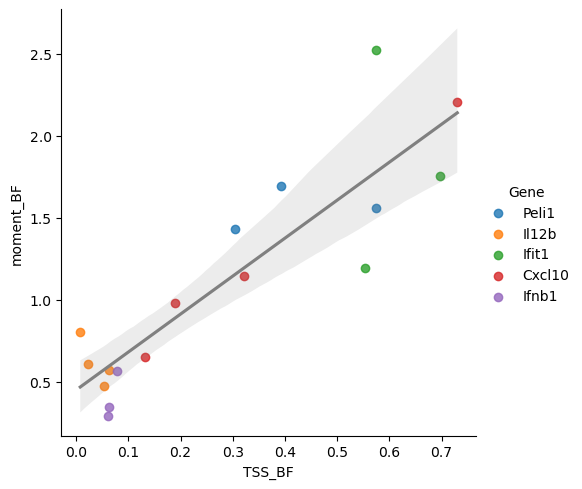

RObject{VecSxp}

	Pearson's product-moment correlation

data:  `#JL`$x and `#JL`$y
t = 7.5155, df = 15, p-value = 1.843e-06
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.7128108 0.9595752
sample estimates:
      cor 
0.8889079 



In [2]:
ycol = "moment_BF"
xcol = "TSS_BF"
Seaborn.lmplot(data = Pandas.DataFrame(bfs), x= xcol, y = ycol, hue = "Gene",fit_reg = 0)
Seaborn.regplot(data = Pandas.DataFrame(bfs), x= xcol, y = ycol, scatter = false, color = "gray")
x = [ii for ii in bfs[!,xcol]]
y = [ii for ii in bfs[!,ycol]]

savefigwithtext("Corr_"*ycol*xcol*".svg")
R"""cor.test($x, $y)"""

### Burst Size (tss quantification) - Burst Size (moment calculation)

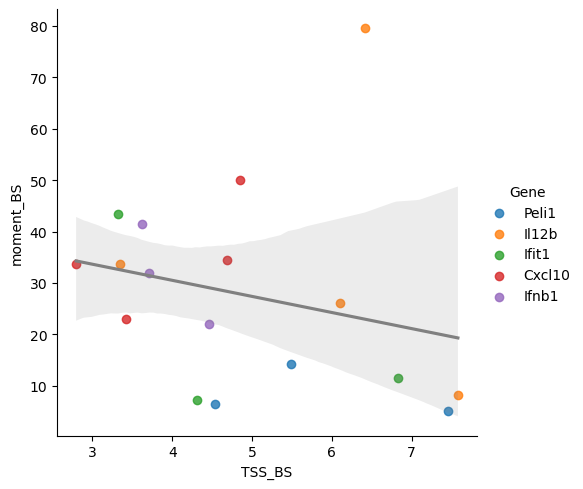

RObject{VecSxp}

	Pearson's product-moment correlation

data:  `#JL`$x and `#JL`$y
t = -0.97913, df = 15, p-value = 0.343
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.6492581  0.2669990
sample estimates:
       cor 
-0.2450999 



In [3]:
ycol = "moment_BS"
xcol = "TSS_BS"
Seaborn.lmplot(data = Pandas.DataFrame(bfs), x= xcol, y = ycol, hue = "Gene",fit_reg = 0)
Seaborn.regplot(data = Pandas.DataFrame(bfs), x= xcol, y = ycol, scatter = false, color = "gray")
x = [ii for ii in bfs[!,xcol]]
y = [ii for ii in bfs[!,ycol]]
savefigwithtext("Corr_"*ycol*xcol*".svg")
R"""cor.test($x, $y)"""

In [4]:
CSV.write("../SourceData/Fig1e.csv", bfs[!,[
        "Genotype",
        "Timepoint",
        "Rep",
        "n_cells",
        "Gene",
        "mean",
        "bootstrap_mean",
        "std",
        "TSS_BS",
        "moment_BS","TSS_BF","moment_BF"]])
import Pkg;Pkg.status()

      Status `~/.julia/environments/v1.6/Project.toml`
  [7e6ae17a] BioSequences v2.0.5
  [336ed68f] CSV v0.9.11
  [8f4d0f93] Conda v1.5.2
  [a93c6f00] DataFrames v1.2.2
  [31c24e10] Distributions v0.25.28
  [c2308a5c] FASTX v1.2.0
  [09f84164] HypothesisTests v0.10.6
  [7073ff75] IJulia v1.23.2
  [916415d5] Images v0.24.1
  [96684042] InformationMeasures v0.3.1
  [10e44e05] MATLAB v0.8.2
  [f8716d33] MultipleTesting v0.5.0
  [92933f4c] ProgressMeter v1.7.1
  [438e738f] PyCall v1.92.5
  [d330b81b] PyPlot v2.10.0
  [6f49c342] RCall v0.13.12
  [d2ef9438] Seaborn v1.0.0
  [2913bbd2] StatsBase v0.33.13
